In [1]:
from helpers import *

## Now with gravity:

In [2]:
initial_power = 600 * si.uW 

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0 * si.G / si.cm,
    grad_r=0,
    power_tweezer=initial_power,
    waist_tweezer=1.838 * si.um,
    a=184.4*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 1064 * si.nm,    
)

zr = float(trap.subs(trap.get_tweezer_rayleigh()))

[8.04411166e+14 3.41463059e+10 7.14412881e+06 3.74494602e+03
 4.39908379e+00 1.36692625e-02] s
-2.1844153222213267e-29


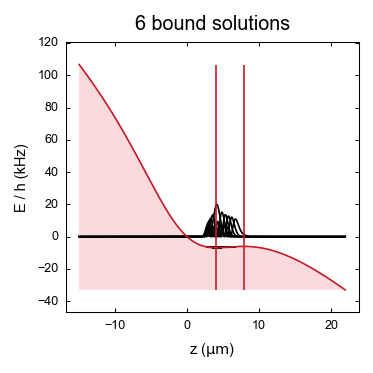

: 

In [ ]:
trap[trap.power_tweezer] = 0.685* initial_power
plot_solutions(trap,200,-1.5*zr,2.2*zr)

  0%|          | 0/150 [00:00<?, ?it/s]

 83%|████████▎ | 125/150 [06:29<00:21,  1.17it/s]<lambdifygenerated-751>:2: RuntimeWarning: overflow encountered in scalar power
  return -1.03831205569593e-38*z**2/(pi**5*(z**2/pi**2 + 1.00808875956951e-11)**3) + 2.59578013923982e-39/(pi**3*(z**2/pi**2 + 1.00808875956951e-11)**2)
<lambdifygenerated-752>:2: RuntimeWarning: overflow encountered in scalar power
  return 6.22987233417557e-38*z**3/(pi**7*(z**2/pi**2 + 1.00808875956951e-11)**4) - 3.11493616708779e-38*z/(pi**5*(z**2/pi**2 + 1.00808875956951e-11)**3)
<lambdifygenerated-750>:2: RuntimeWarning: overflow encountered in scalar power
  return 2.59578013923982e-39*z/(pi**3*(z**2/pi**2 + 1.00808875956951e-11)**2) - 2.67062937174555e-24
<lambdifygenerated-751>:2: RuntimeWarning: invalid value encountered in scalar divide
  return -1.03831205569593e-38*z**2/(pi**5*(z**2/pi**2 + 1.00808875956951e-11)**3) + 2.59578013923982e-39/(pi**3*(z**2/pi**2 + 1.00808875956951e-11)**2)
<lambdifygenerated-752>:2: RuntimeWarning: invalid value encoun

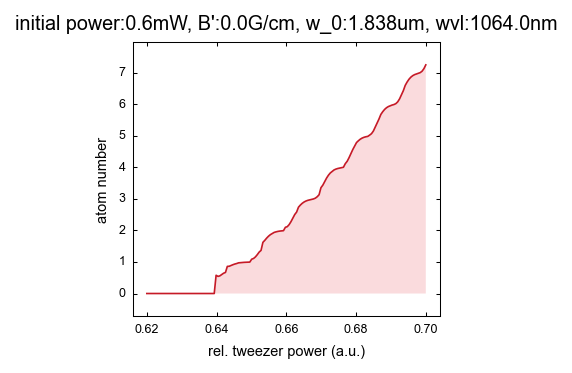

In [21]:
trap[trap.power_tweezer] = initial_power
plot_occupation(trap,200,-1.5*zr,2.2*zr,power_fac_down=0.62,power_fac_up=0.7,n_spill_steps=150)

### With more gridpoints to check if that makes spilling more smooth

 83%|████████▎ | 125/150 [10:01<01:01,  2.47s/it]<lambdifygenerated-503>:2: RuntimeWarning: overflow encountered in scalar power
  return -1.03831205569593e-38*z**2/(pi**5*(z**2/pi**2 + 1.00808875956951e-11)**3) + 2.59578013923982e-39/(pi**3*(z**2/pi**2 + 1.00808875956951e-11)**2)
<lambdifygenerated-504>:2: RuntimeWarning: overflow encountered in scalar power
  return 6.22987233417557e-38*z**3/(pi**7*(z**2/pi**2 + 1.00808875956951e-11)**4) - 3.11493616708779e-38*z/(pi**5*(z**2/pi**2 + 1.00808875956951e-11)**3)
<lambdifygenerated-502>:2: RuntimeWarning: overflow encountered in scalar power
  return 2.59578013923982e-39*z/(pi**3*(z**2/pi**2 + 1.00808875956951e-11)**2) - 2.67062937174555e-24
<lambdifygenerated-503>:2: RuntimeWarning: invalid value encountered in scalar divide
  return -1.03831205569593e-38*z**2/(pi**5*(z**2/pi**2 + 1.00808875956951e-11)**3) + 2.59578013923982e-39/(pi**3*(z**2/pi**2 + 1.00808875956951e-11)**2)
<lambdifygenerated-504>:2: RuntimeWarning: invalid value encoun

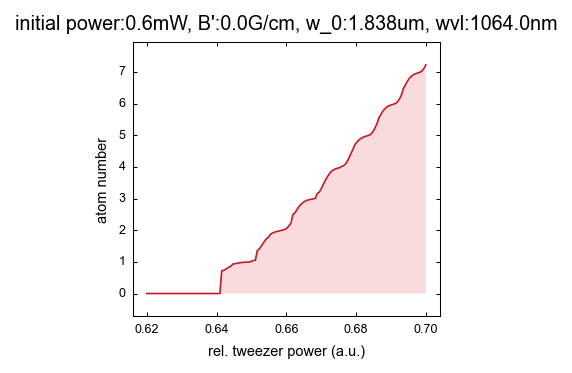

In [3]:
trap[trap.power_tweezer] = initial_power
plot_occupation(trap,200,-1.5*zr,2.2*zr,power_fac_down=0.62,power_fac_up=0.7,n_spill_steps=150,n_pot_steps=4000)

## Check if gravity is consistent:
We would expect gravity to equivalent to this magnetic gradient:

In [6]:
grav_grad = float(trap.subs(trap.m*const.g/trap.mu_b) /si.G*si.cm)
print(f"{grav_grad}G/cm")

2.8999920616468033G/cm


Check with no gravity and only magnetic gradient:

In [7]:
initial_power = 600 * si.uW 

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= grav_grad * si.G / si.cm,
    grad_r=0,
    power_tweezer=initial_power,
    waist_tweezer=1.838 * si.um,
    a=184.4*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 1064 * si.nm,    
)

zr = float(trap.subs(trap.get_tweezer_rayleigh()))

-2.3722450803097887e-29


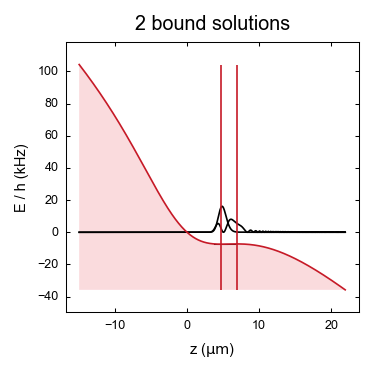

In [8]:
trap[trap.power_tweezer] = 0.65* initial_power
plot_solutions(trap,200,-1.5*zr,2.2*zr)

  0%|          | 0/150 [00:00<?, ?it/s]

 83%|████████▎ | 125/150 [05:12<00:07,  3.43it/s]<lambdifygenerated-1111>:2: RuntimeWarning: overflow encountered in scalar power
  return -1.03831205569593e-38*z**2/(pi**5*(z**2/pi**2 + 1.00808875956951e-11)**3) + 2.59578013923982e-39/(pi**3*(z**2/pi**2 + 1.00808875956951e-11)**2)
<lambdifygenerated-1112>:2: RuntimeWarning: overflow encountered in scalar power
  return 6.22987233417557e-38*z**3/(pi**7*(z**2/pi**2 + 1.00808875956951e-11)**4) - 3.11493616708779e-38*z/(pi**5*(z**2/pi**2 + 1.00808875956951e-11)**3)
<lambdifygenerated-1110>:2: RuntimeWarning: overflow encountered in scalar power
  return 2.59578013923982e-39*z/(pi**3*(z**2/pi**2 + 1.00808875956951e-11)**2) - 2.67062937174555e-24
<lambdifygenerated-1111>:2: RuntimeWarning: invalid value encountered in scalar divide
  return -1.03831205569593e-38*z**2/(pi**5*(z**2/pi**2 + 1.00808875956951e-11)**3) + 2.59578013923982e-39/(pi**3*(z**2/pi**2 + 1.00808875956951e-11)**2)
<lambdifygenerated-1112>:2: RuntimeWarning: invalid value e

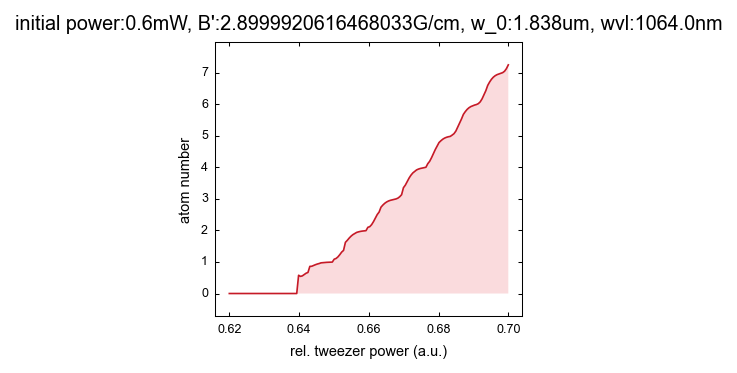

In [9]:
trap[trap.power_tweezer] = initial_power
plot_occupation(trap,200,-1.5*zr,2.2*zr,power_fac_down=0.62,power_fac_up=0.7,n_spill_steps=150)

Looks good :)

## Compare to 532:

In [3]:
initial_power = 1000 * si.uW 

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0 * si.G / si.cm,
    grad_r=0,
    power_tweezer=initial_power,
    waist_tweezer=1.838 * si.um,
    a=180*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 532 * si.nm,    
)

zr = float(trap.subs(trap.get_tweezer_rayleigh()))

[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan         

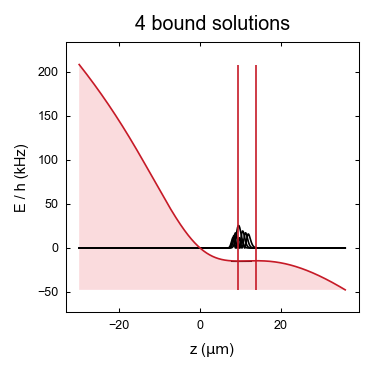

In [4]:
trap[trap.power_tweezer] = 0.8* initial_power
plot_solutions(trap,200,-1.5*zr,1.8*zr)

  0%|          | 0/150 [00:00<?, ?it/s]

 84%|████████▍ | 126/150 [08:10<00:27,  1.16s/it]<lambdifygenerated-790>:2: RuntimeWarning: overflow encountered in scalar power
  return 2.07579770935822e-38*z/(pi**3*(z**2/pi**2 + 4.03235503827802e-11)**2) - 2.67062937174555e-24
<lambdifygenerated-791>:2: RuntimeWarning: overflow encountered in scalar power
  return -8.30319083743287e-38*z**2/(pi**5*(z**2/pi**2 + 4.03235503827802e-11)**3) + 2.07579770935822e-38/(pi**3*(z**2/pi**2 + 4.03235503827802e-11)**2)
<lambdifygenerated-792>:2: RuntimeWarning: overflow encountered in scalar power
  return 4.98191450245972e-37*z**3/(pi**7*(z**2/pi**2 + 4.03235503827802e-11)**4) - 2.49095725122986e-37*z/(pi**5*(z**2/pi**2 + 4.03235503827802e-11)**3)
<lambdifygenerated-791>:2: RuntimeWarning: invalid value encountered in scalar divide
  return -8.30319083743287e-38*z**2/(pi**5*(z**2/pi**2 + 4.03235503827802e-11)**3) + 2.07579770935822e-38/(pi**3*(z**2/pi**2 + 4.03235503827802e-11)**2)
<lambdifygenerated-792>:2: RuntimeWarning: invalid value encoun

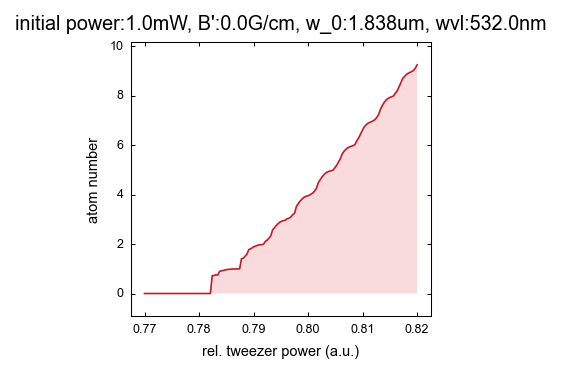

In [23]:
trap[trap.power_tweezer] = initial_power
plot_occupation(trap,200,-1.5*zr,1.8*zr,power_fac_down=0.77,power_fac_up=0.82,n_spill_steps=150)

[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan         

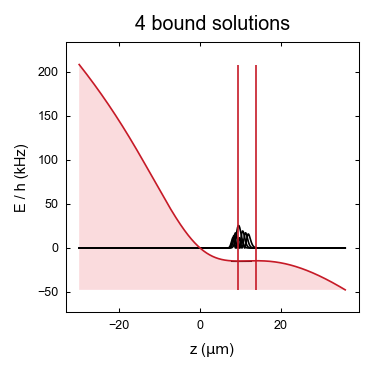

In [5]:
trap[trap.power_tweezer] = 0.8* initial_power
plot_solutions(trap,200,-1.5*zr,1.8*zr)